<a href="https://colab.research.google.com/github/TatianaO8/AI/blob/master/HW_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 2 (Problem 2)

## Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Generate random data

In [0]:
# generate m random pairs (x_1, y_1)

m = 100
X_1 = 2 * np.random.rand(m, 1)
X_2 = 2 * np.random.rand(m, 1)
X = np.array([X_1, X_2])
y_1 = 4 + 3 * X_1 + np.random.rand(m, 1)
y_2 = 4 + 3 * X_2 + np.random.rand(m, 1)

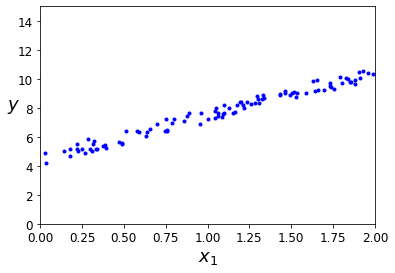

In [339]:
plt.plot(X_1, y_1, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

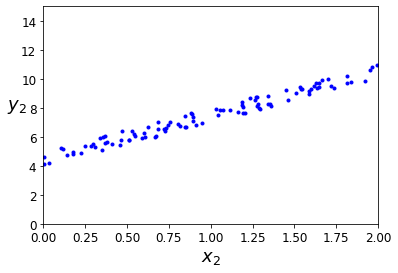

In [340]:
plt.plot(X_2, y_2, "b.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y_2$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Combine bias $b=w_0$ and weight $w_1$

Linear regression predicts $\hat{y}=b + w_1 x_1$. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1)$ and $x=(1, x_1)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X_1, X_2])
y = np.column_stack([y_1, y_2])

In [342]:
print(X1_b.shape)
print(X_b.shape)

(100, 2)
(100, 3)


In [343]:
# show the first 5 rows
print(X1_b[:5, :])
#print("Now combined")
#print(X_b[:5, :])

[[1.         1.06448998]
 [1.         0.25148302]
 [1.         0.26542931]
 [1.         0.28708472]
 [1.         1.87963958]]


## Linear regression using batch gradient descent 
All training examples are used to compute the gradient.

In [344]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 
print(initial_weight)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


In [345]:
# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y_1.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

(3, 1)
(100, 1)
(100, 1)
(3, 1)


# Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [347]:
weight_path_mgd[-1]

array([[3.24311881, 3.23341963],
       [3.05099334, 0.85122944],
       [1.07362465, 3.22448313]])

In [348]:
weight_path_mgd = np.array(weight_path_mgd)

ValueError: ignored

### Compare the three types

In [0]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="stochastic")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-s", linewidth=3, label="batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()

In [0]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="stochastic")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-s", linewidth=3, label="batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([3, 4.5, 2.5, 4])
plt.show()